# 缺少正则化

In [1]:
# 小组成员  卢双强  王文娜  于双龙
import numpy as np
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
print(iris.data[:3,:])
print(iris.feature_names)
print(iris.target_names)
for i in range(len(iris.target)):
    if iris.target[i] != 0:
        iris.target[i] = 1
train_data, test_data, train_label, test_label = train_test_split(iris.data, iris.target, test_size=0.2,)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
def get_batch(features, labels, batch_size):
    nums = len(features)
    index = [i for i in range(nums)]
    random.shuffle(index)
    for i in range(0, nums, batch_size):
        batch_index = index[i : min(i + batch_size, nums)]
        yield features[batch_index], labels[batch_index]
        
        
for x, y in get_batch(iris.data, iris.target, 5):
    print(x)
    print(y)

[[6.9 3.1 5.4 2.1]
 [4.7 3.2 1.6 0.2]
 [6.3 3.3 6.  2.5]
 [5.4 3.  4.5 1.5]
 [5.7 2.6 3.5 1. ]]
[1 0 1 1 1]
[[4.3 3.  1.1 0.1]
 [4.4 3.2 1.3 0.2]
 [6.8 3.2 5.9 2.3]
 [6.8 2.8 4.8 1.4]
 [5.6 3.  4.5 1.5]]
[0 0 1 1 1]
[[7.1 3.  5.9 2.1]
 [5.7 2.8 4.5 1.3]
 [4.8 3.  1.4 0.1]
 [4.9 2.5 4.5 1.7]
 [5.  3.  1.6 0.2]]
[1 1 0 1 0]
[[4.6 3.6 1.  0.2]
 [4.5 2.3 1.3 0.3]
 [5.5 2.6 4.4 1.2]
 [5.8 2.7 3.9 1.2]
 [5.8 2.7 4.1 1. ]]
[0 0 1 1 1]
[[5.7 2.8 4.1 1.3]
 [6.4 2.8 5.6 2.1]
 [7.9 3.8 6.4 2. ]
 [5.5 4.2 1.4 0.2]
 [6.7 3.3 5.7 2.1]]
[1 1 1 0 1]
[[5.1 3.5 1.4 0.3]
 [5.1 2.5 3.  1.1]
 [6.4 2.9 4.3 1.3]
 [5.  3.4 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 1 1 0 0]
[[4.8 3.1 1.6 0.2]
 [5.7 2.5 5.  2. ]
 [6.7 3.  5.  1.7]
 [5.6 2.8 4.9 2. ]
 [7.7 3.8 6.7 2.2]]
[0 1 1 1 1]
[[6.3 2.3 4.4 1.3]
 [6.2 2.9 4.3 1.3]
 [6.3 2.5 5.  1.9]
 [5.9 3.  4.2 1.5]
 [6.  2.2 5.  1.5]]
[1 1 1 1 1]
[[5.6 2.7 4.2 1.3]
 [5.8 2.8 5.1 2.4]
 [7.7 2.6 6.9 2.3]
 [6.3 3.3 4.7 1.6]
 [6.  2.7 5.1 1.6]]
[1 1 1 1 1]
[[5.8 2.7 5.1 1.9]
 [6.  3.4

In [4]:
def sigmoid(X):
    return 1.0/(1+np.exp(-X))

In [5]:
def cross_enrtropy(y, y_hat):
    return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

In [6]:
def sgd(X, Y, w, b, batch_size, learningrate):
    gradient_w = (1/batch_size)*(np.dot(X.T, (sigmoid(np.dot(X, w.T))-Y)))
    gradient_b = (1/batch_size)*(np.sum(sigmoid(np.dot(X, w.T))-Y))
    w -= learningrate * gradient_w
    b -= learningrate * gradient_b

In [7]:
w = np.random.normal(0, 1, iris.data.shape[1])
b = np.zeros(1)
epoch = 100
# 当batch_size等于样本大小时为BGD
batch_size = 128
learning_rate = 0.1
train_loss = []
for i in range(epoch):
    for x, y in get_batch(train_data, train_label, batch_size):
        sgd(x, y, w, b, batch_size, learning_rate)
    train_loss.append(cross_enrtropy(y, sigmoid(np.dot(x, w.T) + b)).mean())

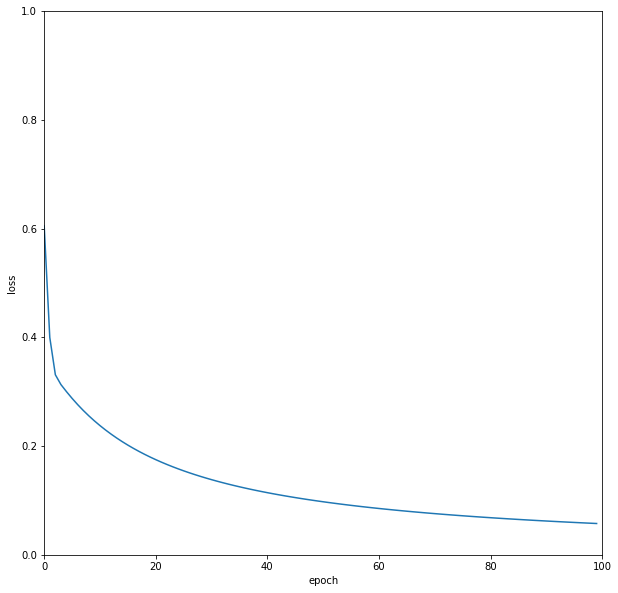

In [8]:
plt.figure(figsize=(10,10))
plt.xlim((0, epoch))
plt.ylim((-0, 1))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(train_loss)
plt.show()

In [9]:
def predict(x):
    y = sigmoid(np.dot(x, w.T)+b)
    return (y > 0.5).astype(int)    

[[ 9.  0.]
 [ 0. 21.]]


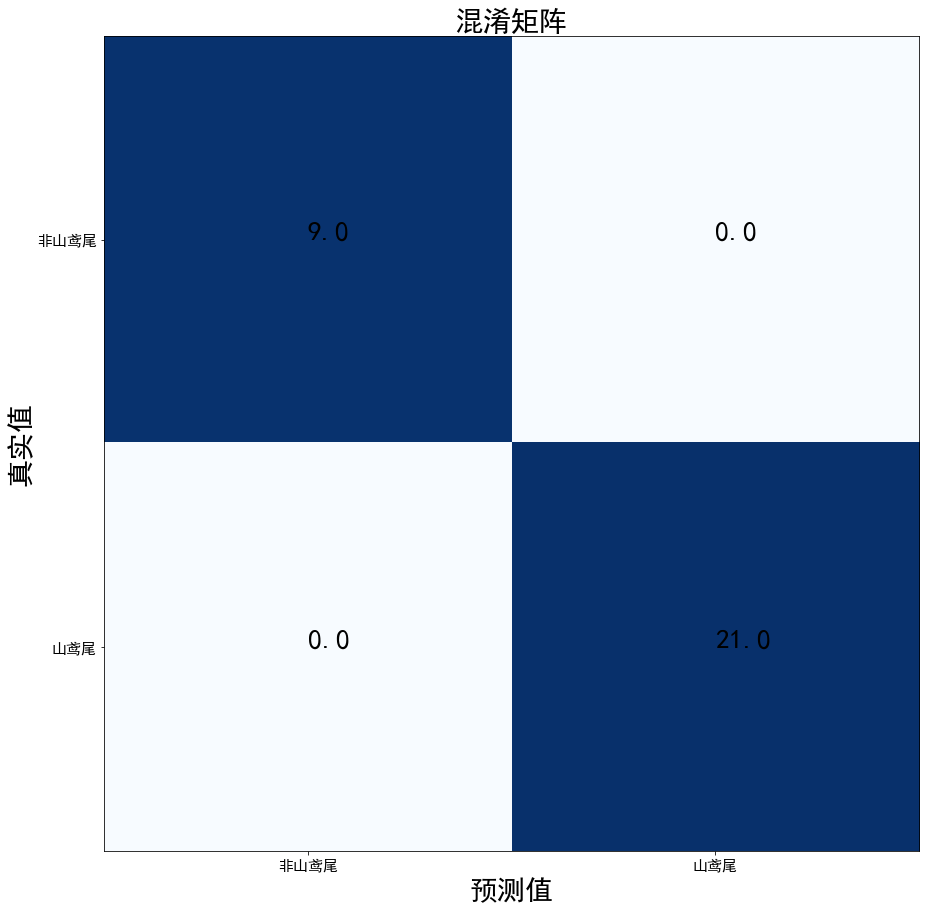

In [10]:
matrix = np.zeros((2,2))
    
predic = predict(test_data)
for p, t in zip(predic, test_label):
    matrix[p, t] += 1
    
print(matrix)

plt.figure(figsize=(15,15))
confusion = np.array(([91,0],[0,92]))
# 热度图，后面是指定的颜色块，可设置其他的不同颜色
plt.imshow(confusion, cmap=plt.cm.Blues)
plt.xticks(range(2), ['非山鸢尾', '山鸢尾'], fontsize = 15)
plt.yticks(range(2), ['非山鸢尾', '山鸢尾'], fontsize = 15)
# plt.rcParams两行是用于解决标签不能显示汉字的问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('预测值', fontsize = 28)
plt.ylabel('真实值', fontsize = 28)
plt.title('混淆矩阵',fontsize = 28)
for x, z in enumerate(matrix):
    for y, p in enumerate(z):
        plt.text(x ,y, p, fontsize=28)
plt.show()